# Loading the Dataset



In [6]:
import pandas as pd
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


# **Feature Engineering – Price & Discount**


We clean and convert the price columns by removing the $ symbol and converting the values to numeric type.
Missing values in originalPrice are filled with the actual price, assuming no discount.
We then calculate the discount_percent for each product.

In [7]:

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)
df['originalPrice'].fillna(df['price'], inplace=True)
df['discount_percent'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df[['productTitle', 'originalPrice', 'price', 'discount_percent', 'sold']].head()


<ipython-input-7-1799346932>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['originalPrice'].fillna(df['price'], inplace=True)


,productTitle,originalPrice,price,discount_percent,sold
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,0.000000,600
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0.000000,0
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,49.668367,7
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0.000000,0
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,56.226956,1


# **EDA – Discount % vs Units Sold**

This scatter plot shows the relationship between discount percentage and number of units sold.
It helps visualize whether higher discounts lead to higher sales volume.


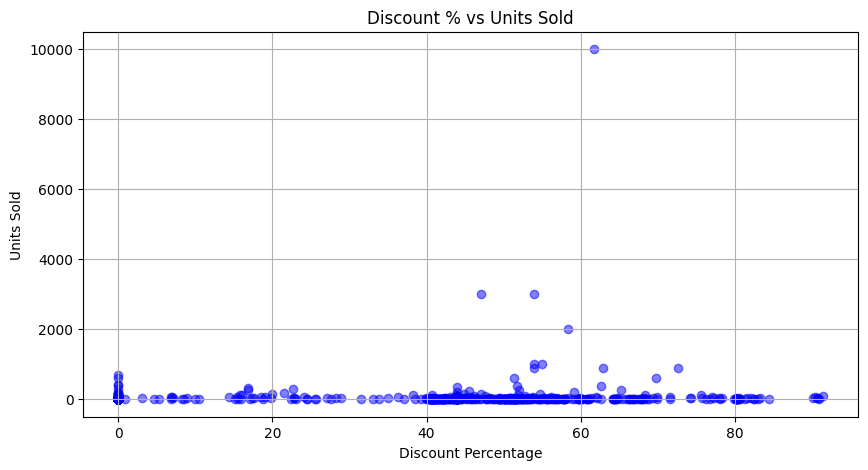

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(df['discount_percent'], df['sold'], alpha=0.5, color='blue')
plt.title('Discount % vs Units Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


# **EDA – Price vs Units Sold**

This scatter plot shows how the product price affects the number of units sold.
It helps analyze whether lower-priced products sell more frequently.

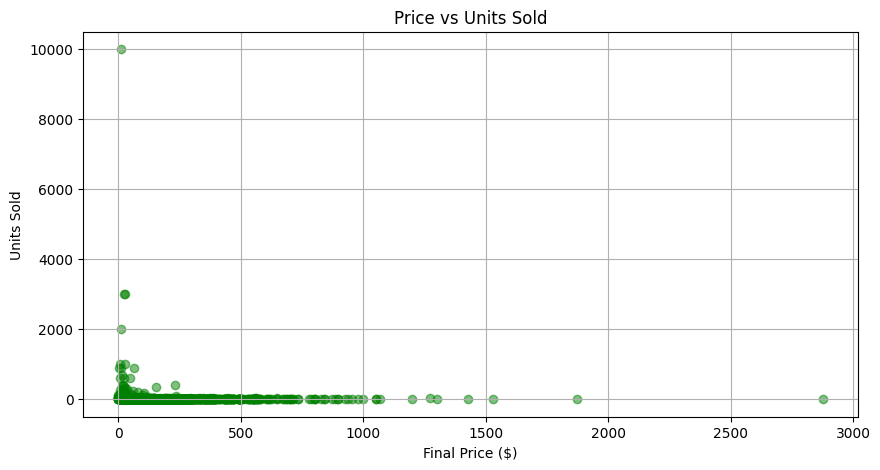

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(df['price'], df['sold'], alpha=0.5, color='green')
plt.title('Price vs Units Sold')
plt.xlabel('Final Price ($)')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


# **EDA – Top 10 Best-Selling Products**
This table displays the top 10 products based on the number of units sold.
It provides insight into which product types or categories perform the best in the dataset.

In [10]:
top_products = df.sort_values('sold', ascending=False).head(10)
top_products[['productTitle', 'sold']]



,productTitle,sold
1008,Portable round Folding Chair Accordion Chair H...,10000
696,MUMUCC Multifunctional Foldable And Adjustable...,3000
1391,MUMUCC Multifunctional Foldable And Adjustable...,3000
1021,Stylish Shoe Rack Metal Simple Shoe Shelf Foot...,2000
22,Office Furniture Computer Stand 42*26cm Adjust...,1000
1174,Portability Foot Rest Under Desk Footrest Ergo...,1000
1016,"Monitor Stand for 13-32 inches Screens, Dual M...",900
693,Portability Foot Rest Under Desk Footrest Ergo...,900
1511,Portable Folding Telescopic Stool Lightweight ...,900
494,Shoe-shelf Shoerack Multilayer Shoe Rack Shoeb...,700


# **Model Setup – Regression (Sold Prediction)**
In this step, we prepare the data for regression modeling.
We define the features (price, originalPrice, discount_percent, free_shipping) and the target variable (sold).
We then split the data into training and testing sets for evaluation.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df['free_shipping'] = df['tagText'].apply(lambda x: 1 if 'Free shipping' in str(x) else 0)
features = ['price', 'originalPrice', 'discount_percent', 'free_shipping']
target = 'sold'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training & Evaluation – Regression**
We train and evaluate two regression models:

Linear Regression

Random Forest Regressor

Model performance is measured using:

MAE (Mean Absolute Error)

MSE (Mean Squared Error)

R² Score

These metrics help us assess how well the models predict exact sales numbers.



In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)



📊 Linear Regression
MAE: 29.438313599814865
MSE: 5467.935844417342
R² Score: 0.0028418121016271503

📊 Random Forest
MAE: 38.27628342261905
MSE: 69566.47275049624
R² Score: -11.686465218349362



# **Problem Reframing – Convert Sales to Categories**
Since predicting exact sales is difficult due to data imbalance and outliers, we convert the regression problem into a classification task.

In [13]:
def label_sale(x):
    if x <= 5:
        return 0
    elif x <= 100:
        return 1
    else:
        return 2
df['sale_category'] = df['sold'].apply(label_sale)


# **Model Training & Evaluation – Classification**
We train a Random Forest Classifier to predict the sales category.
This approach works better than regression for skewed sales data.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

features = ['price', 'originalPrice', 'discount_percent', 'free_shipping']
target = 'sale_category'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔁 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       238
           1       0.52      0.56      0.54       151
           2       0.20      0.09      0.12        11

    accuracy                           0.64       400
   macro avg       0.48      0.45      0.46       400
weighted avg       0.64      0.64      0.64       400

🔁 Confusion Matrix:
[[169  69   0]
 [ 62  85   4]
 [  2   8   1]]
